# Regresión Lineal II

## **1. Analisis preliminar**

### 1.1 Conociendo el dataset

* Importando la biblioteca pandas



In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Ignorar las advertencias para una salida más limpia
warnings.filterwarnings('ignore')  # warnings.filterwarnings(action='once')

**El Dataset y el Proyecto**


**Descripción:**El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados en las características de este mercado, los inmuebles y el entorno de estos inmuebles.

En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.

Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

**Datos:**

1. **Valor:** - Valor (US$) de oferta del inmueble
2. **Área:**- Área del inmueble en m²
3. **Dist_Playa**- Distancia del inmueble a la playa (km) (en línea recta)
4. **Dist_Farmacia** - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)


* Lectura de los datos

In [66]:
datos = pd.read_csv('dataset.csv', sep=';')

* Ver los datos

In [67]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374


* Verificando el tamaño del dataset

In [68]:
datos.shape

(5000, 4)

### 1.2 Analisis preliminar

* Estadísticos descriptivos


In [69]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


Se pueden ver que para la variable valor tiene un máximo muy discrepante, está al nivel de 4 millones de dólares, lo que sugiere quizás aquí puede ser un outlier, pero antes de hacer cualquier tratamiento para outliers es aconsejable hacer un análisis gráfico de la variable para ver si tiene sentido considerar ese valor como outliers.

Lo mismo pasa para la variable área, que tiene un valor máximo discrepante de 2000 metros cuadrados. Y para las variables distancias todo parece normal, no hay ningún valor raro. Ese valor 0 en min significa que el inmueble está ubicado al lado de la playa o de la farmacia. Ahora pasemos a la matriz de correlación que es una medida de asociación lineal entre dos variables.

**Matriz de correlación:** El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [70]:
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Lo primero que tenemos que ver es la correlación entre las variables que queremos predecir que es el valor del inmueble con el resto de las variables.

Mirando dentro de la primera línea, podemos ver una correlación alta de 0.7 entre valor y área. Y vemos una correlación moderada de -0.36 entre valor y distancia a la playa. La señal negativa tiene sentido, o sea, cuanto más distante a la playa, menor el valor del inmueble, y aquí también podemos ver que la señal positiva también tiene sentido. Cuanto mayor sea el área del inmueble, mayor será el valor del inmueble. Y por último, vemos una correlación muy baja entre valor y distancia a la farmacia. Más adelante veremos a través de pruebas más formales e hipótesis si esta variable distancia a la playa hace sentido para predecir el valor del inmueble.

Esto vamos a analizar, vamos a analizar más adelante, pues vemos que la correlación es muy baja entre valor y distancia a la farmacia. Y, por último, necesitamos que las tres variables explicativas, candidatas a explicativas, no tengan correlación fuerte entre sí, pues esto es muy malo a la hora de estimar el modelo.

Lo primero que vemos aquí, podemos ver que área tiene una correlación moderada, no es alta, con distancia a la playa y tiene una correlación muy baja con distancia a la farmacia. Y por último, vemos que distancia a la playa tiene una correlación muy baja con distancia a farmacia. Entonces, podríamos concluir que las tres candidatas a variables explicativas no tienen correlación fuerte entre sí y por eso podemos usarlas en nuestro modelo de estimación al principio.

## **2. Analisis grafico**

### 2.1 Comportamiento de la variable dependiente (Y)

En este capitulo haremos análisis gráficos de la variable dependiente y a partir de este análisis, tomaremos algunas decisiones para el resto de nuestro proyecto.

* Configuración del formato de los gráficos

In [71]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

* Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

* Boxplot

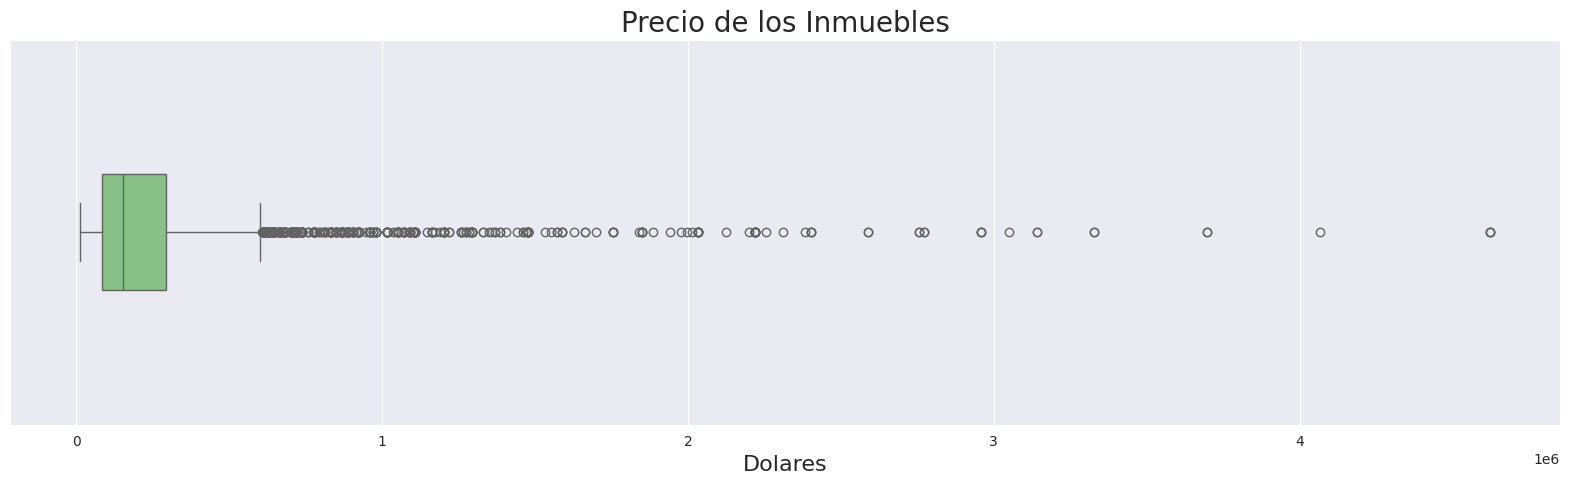

In [72]:
ax=sns.boxplot(data=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax;

Mirando el boxplot, puede que estemos aterrorizados al principio, pero debemos saber que este tipo de variable tiene este tipo de comportamiento, comportamiento con muchos puntos por encima del límite superior. Y es debido a este peculiar comportamiento que debemos tener cuidado al clasificar todos estos puntos como outliers, quizás solo los últimos tres puntos son realmente outliers. Bueno, como podemos ver, estas pilas de puntos por encima por encima del límite superior puede indicar una simetría a la derecha en la distribución de la variable precio de los inmuebles.

Para entender mejor esto, en el siguiente grafico, vamos a ver el histograma de la variable dependiente.

### 2.2 Distribución de frecuencias

* Histograma

Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

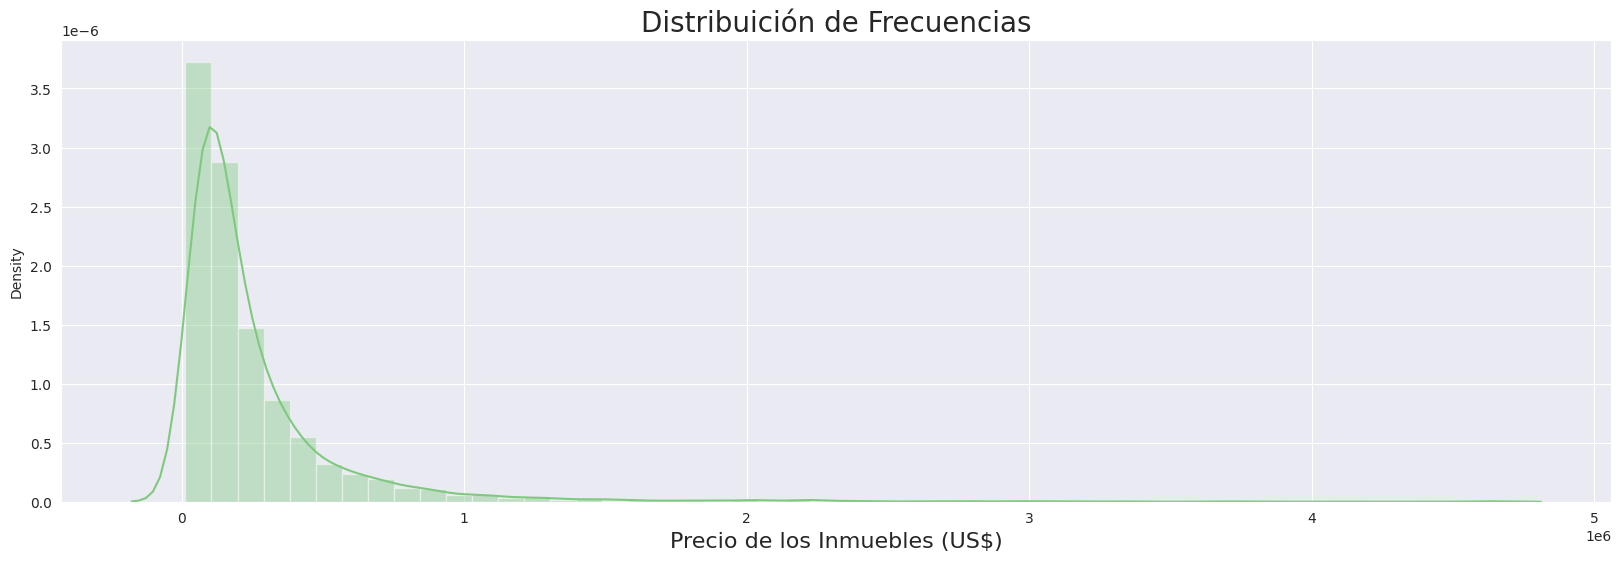

In [73]:
ax=sns.distplot(datos['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
ax;

Analizando el histograma, podemos ver la concentración para valores más bajos, o sea, una simetría a la derecha del gráfico. Esto tiene sentido para este tipo de variables donde hay muchos inmuebles con precios bajos y pocos inmuebles con precios extravagantes, o sea, inmuebles de lujo.

Este tipo de comportamiento es muy común y aparece en los datos reales, pero esto, el problema es que esto puede generar problemas a la hora de estimar el modelo de regresión pues uno de los supuestos teóricos del modelo de regresión es que la variable dependiente tenga una distribucion normal, o sea una forma simetrica.

Obviamente, esta simetría perfecta difícilmente sucederá con datos reales. Pues siempre habrá una asimetría, aunque sea leve, pero la idea es que la distribución de nuestra variable se acerque lo más posible a este formato. Como podemos ver, nuestro histograma tiene un formato parecido al primer ejemplo, la simetría a la derecha y consecuentemente nuestro boxplot se parece al este respectivo boxlplot.

Como dije, este tipo de variable, con una gran asimetría, puede generar problemas a la hora de sumar el modelo de regresión. Sin embargo, podemos hacer transformaciones de los datos para que su distribución sea menos asimétrica y se acerque a este tipo de gráfico del medio.

Es este procedimiento, son sobre esas transformaciones que vamos a trabajar este proyecto. Pero antes de eso, en el siguiente grafico vamos a analizar la dispersión entre las variables para ver si existe una relación lineal entre la variable dependiente y las variables explicativas, pero vamos a ver que la relación lineal es difícil de existir debido en gran parte a características asimétricas de nuestros datos de la variable dependiente.

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

### 2.3 Dispersión entre las Variables

Ahora vamos a ver si realmente existe una relación lineal entre la variable dependiente y la variable explicativa. Para esto vamos a usar pairplot,

* Gráficos de dispersión entre las variables del dataset

**Pairplot:** Grafica la relación entre pares de variables en un dataset.

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot



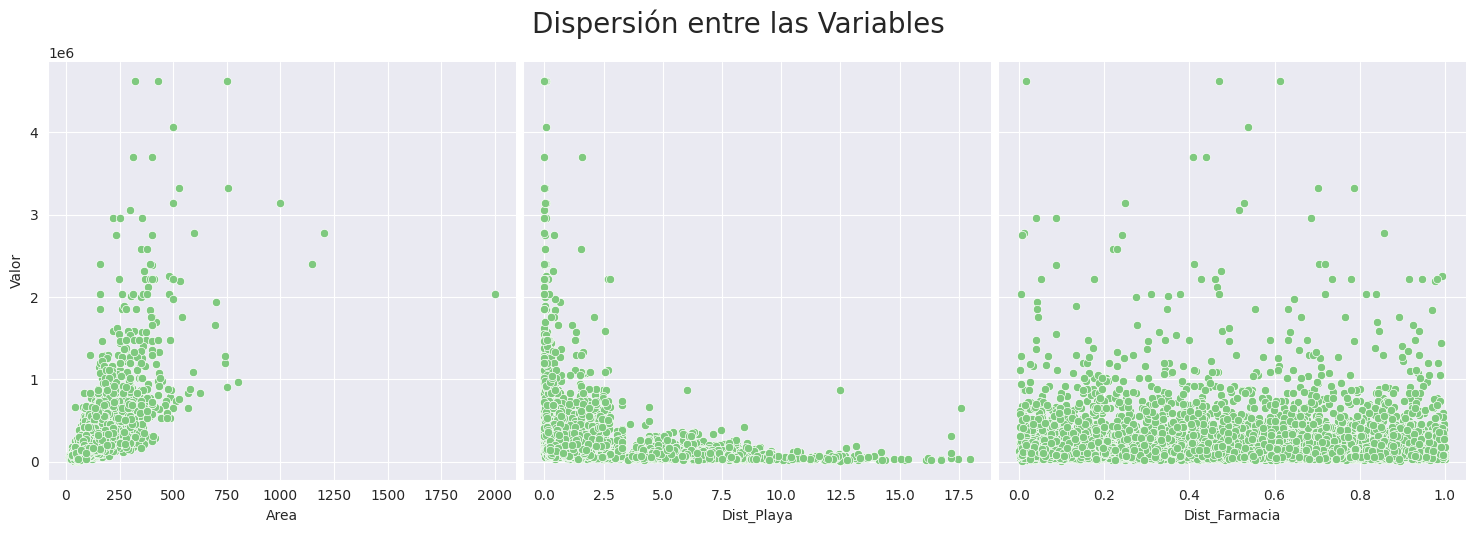

In [74]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax;

Podemos ver que los puntos están dispersos, por ejemplo, entre valor y área podemos ver que hay quizás una cierta tendencia no lineal, o sea, una curva. Lo mismo se pasa entre valor y Dist_Playa podemos ver una cierta curva.

Y entre valor y Dist_Farmacia no podemos identificar ninguna tendencia. O sea, los puntos no muestran ninguna dirección. Para ver mejor lo que pasa, podemos incluir para la línea de regresión, la recta de regresión.

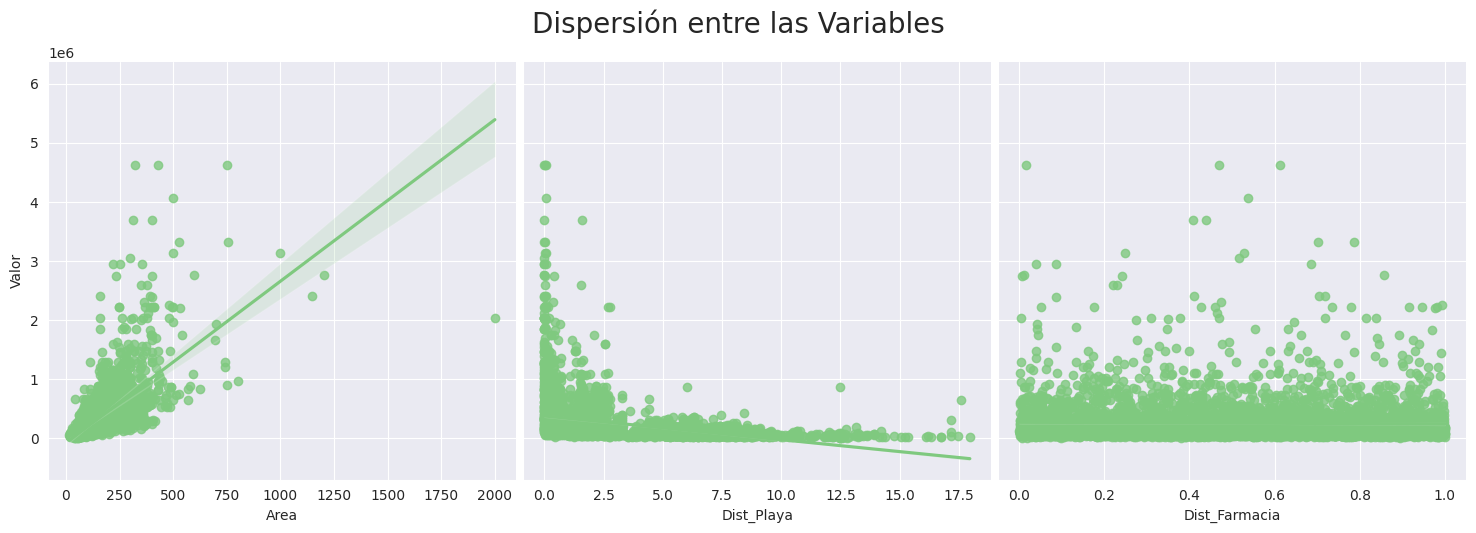

In [75]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax;

Aquí podemos observar claramente que los puntos no se ajustan a la línea de regresión. Por ejemplo, en el tercer gráfico (Dist_Farmacia), la línea de regresión es completamente plana y no es visible debido a la dispersión de los puntos.

Por lo tanto, podemos concluir que la variable "valor" no muestra una relación lineal clara con las variables explicativas. En consecuencia, no podemos estimar un modelo de regresión lineal con precisión. En el siguiente capítulo, aplicaremos una técnica de transformación conocida como transformación logarítmica. Esta transformación se aplicará tanto a la variable dependiente como a las variables explicativas.

Posteriormente, analizaremos cómo cambian las relaciones entre las variables después de la transformación, con el objetivo de identificar una posible relación lineal entre la variable dependiente "valor" y las variables explicativas "Área", "Dist_Playa" y "Dist_Farmacia".

## **3. Trasformacion de variables**

### 3.1 Transformando los Datos

Antes de aplicar la transformación volvamos a la distribución normal. ¿Por qué queremos una distribución normal? Los tests estadísticos que vamos a ver, o sea los tests de hipótesis necesitan que la variable dependiente siga una distribución normal.

Y esos tests son muy importantes, pues nos dicen si el modelo existe o no.






* Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

Antes de pasar los datos a la transformación logarítmica, debemos saber que el logaritmo de 1 es 0.

Si escribimos np.log(1) es 0.

In [76]:
np.log(1)

0.0

No hay ningún problema con esto, pues el modelo de relación admite valores iguales a 0, pero debemos saber que el log de 0 es indefinido, no existe, o se escribe en lugar de 1.

In [77]:
np.log(0)

-inf

Tenemos un valor indefinido. ¿Por qué estoy hablando de eso? Porque si vemos el DataFrame de los estadísticos descriptivos, vemos que el valor mínimo, los valores mínimos de las variables distancia son iguales a 0, o sea esas variables tienen valores iguales a 0. Como consecuencia, no podemos aplicar el log directamente a estas dos variables, pues vamos a tener valores indefinidos y el modelo de regresión no admite valores indefinidos.

Entonces, antes de aplicar el log a esas dos variables distancia, tenemos que cambiar sus escalas. ¿Cómo haremos? Haremos el siguiente procedimiento. Vamos a empezar a crear el logaritmo de las variables.

In [78]:
# Creamos nuevas columnas en el DataFrame "datos" que contienen las transformaciones
# logarítmicas de las variables originales
# La función np.log() se utiliza para calcular el logaritmo natural de cada
# valor en las columnas especificadas

# Transformación logarítmica de la variable "Valor"
datos['log_Valor'] = np.log(datos['Valor'])

# Transformación logarítmica de la variable "Area"
datos['log_Area'] = np.log(datos['Area'])

# Transformación logarítmica de la variable "Dist_Playa", se suma 1 antes de
# aplicar el logaritmo para evitar problemas con valores cercanos a cero
datos['log_Dist_Playa'] = np.log(datos['Dist_Playa'] + 1)

# Transformación logarítmica de la variable "Dist_Farmacia", se suma 1 antes de
# aplicar el logaritmo para evitar problemas con valores cercanos a cero
datos['log_Dist_Farmacia'] = np.log(datos['Dist_Farmacia'] + 1)

In [79]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


Vemos que las variables log fueron creadas. Ahora tenemos que ver si la transformación logarítmica logró reducir la asimetría.

* Distribuición de frecuencias de la variable *dependiente transformada* (y)

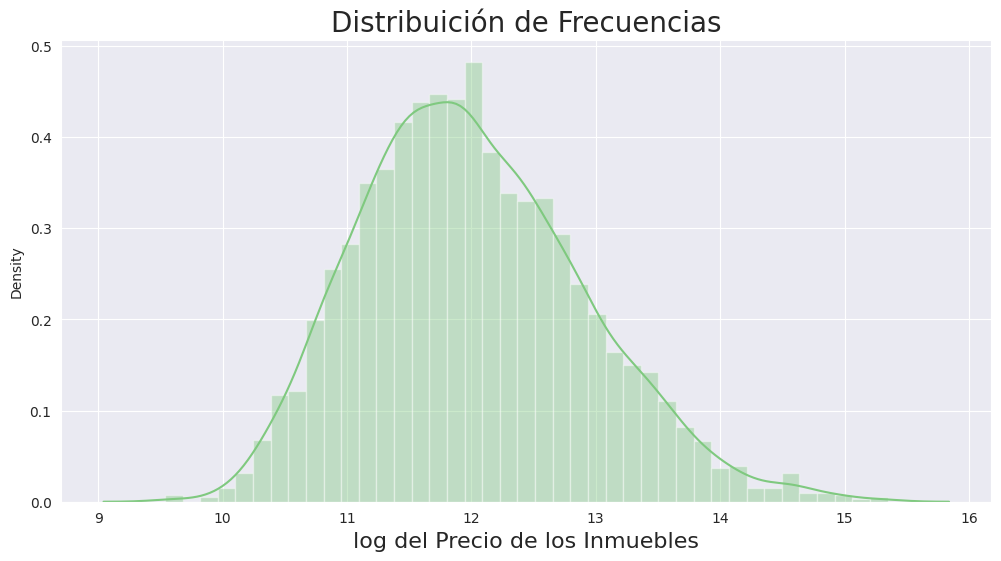

In [80]:
ax=sns.distplot(datos['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax;

Vemos que aquí no hay más aquella gran cola a la derecha. Entonces vemos que ahora nuestro histograma está más cercano de la distribución normal.

El primer problema, la transformación logarítmica pudo reducir, que fue la gran asimetría que había en la distribución de la variable dependiente.

Ahora vemos que la distribución de la variable transformada no tiene una asimetría muy grande y está ahora más cercana de la variable normal. Ahora tenemos que saber si la transformación logarítmica puede lograr una relación lineal entre la variable dependiente y las variables explicativas.

### 3.2 Comprobando relación lineal

En el último punto vimos que la transformación logarítmica logró reducir la asimetría que había en la variable dependiente, pues vimos que el histograma de la variable transformada, mostró una forma más cercana a la distribución normal.

Ahora queda por ver si con la transformación logarítmica podemos tener relaciones lineales entre la variable dependientes y las variables explicaciones. Para esto tenemos que hacer otra vez el gráfico de dispersión.

* Gráficos de dispersión entre las variables transformadas del dataset

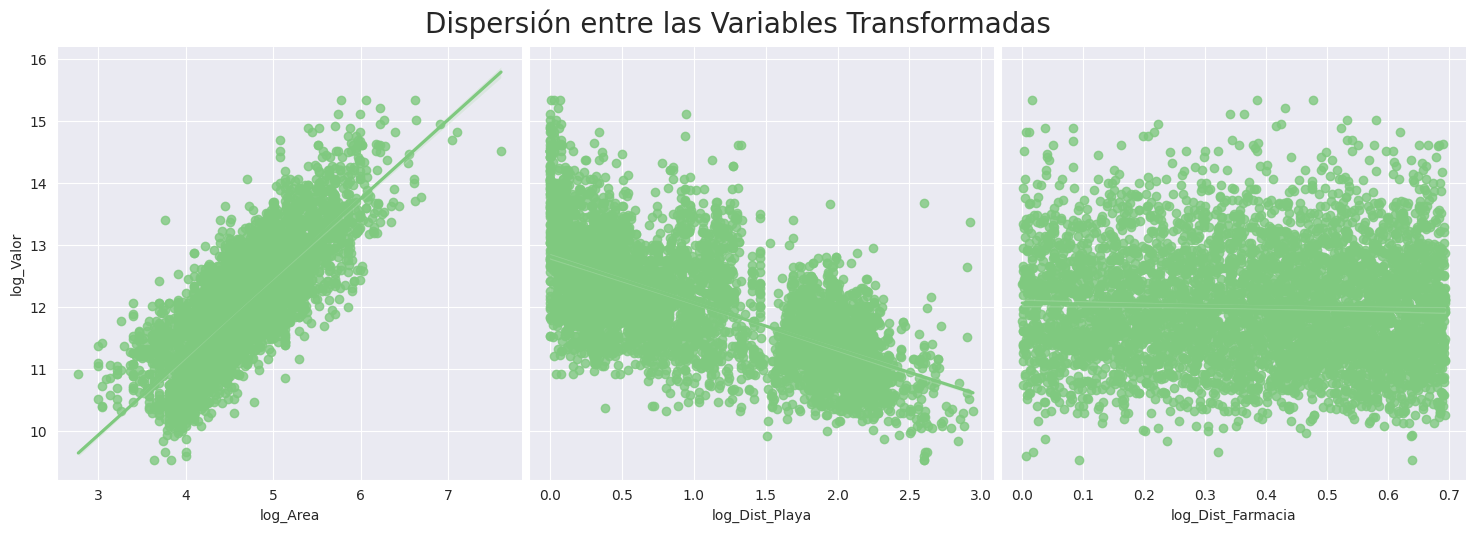

In [81]:
ax=sns.pairplot(datos,y_vars='log_Valor',x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax;

Mirando este gráfico podemos ver que ahora tenemos relaciones más lineales, principalmente entre log_Valor y log_Área, donde vemos una relación lineal positiva y entre log_Valor y log_Dist_Playa, vemos una relación lineal menos fuerte y negativa. La dirección de la relación entre log_Valor y log_Dist_Playa, el coeficiente de correlación ya nos lo había indicado en la tabla de correlación de las variables originales.



In [85]:
datos_corr = datos[['Valor','Area','Dist_Playa','Dist_Farmacia']]
datos_corr.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Vimos que la correlación entre Valor y Dist_Playa fue negativa. Sin embargo todavía no tenemos una relación lineal entre la variable dependiente y log_Dist_Farmacia, pues la variación entre log_Valor y log_Dist_Farmacia es constante, esto también el coeficiente de correlación ya nos lo había indicado, pues la correlación entre la variable valor y la variable Dist_Farmacia fue cercano a 0.

Probablemente esta variable log_Dist_Farmacia será eliminada del modelo al hacer los tests estadísticos que aprenderemos en los próximos capitulos. Ahora que tenemos relaciones más lineales, podemos estimar el modelo de regresión.

## **4. Regresion Lineal con StatsModels**

### 4.1 Creando los *Datasets* de Entrenamiento y Prueba

 Antes de sumar el modelo de regresión, debemos usar un procedimiento ampliamente utilizado que vimos en el proyecto anterior, que consiste en dividir al azar los datos en dos partes, una para entrenar o estimar el modelo y la otra parte para evaluar el modelo en términos de predicciones.

Este procesamiento lo vamos a usar por medio de la función train_test_split de la biblioteca scikit-learn

* Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [90]:
# Importamos la función train_test_split desde la biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split

Para usar la función train_test_split nos pide algunos parámetros de entrada. Los dos primeros son un DataFrame para almacenar la variable dependiente. Le podemos llamar por ejemplo y=datos[‘log_Valor’]

* Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [91]:
y=datos['log_Valor']

El segundo parámetro de entrada es el DataFrames que almacenará las variables explicativas. Le podemos llamar por, por ejemplo X=datos.

* Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [92]:
X=datos[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

Ya podemos empezar a usar esta función.

* Creando los datasets de entrenamiento y de prueba

In [93]:
# Dividimos los datos en conjuntos de entrenamiento y prueba utilizando la
# función train_test_split

# X son las variables explicativas, y es la variable dependiente

# El parámetro test_size=0.2 indica que el 20% de los datos se asignarán al
# conjunto de prueba, mientras que el 80% se asignará al conjunto de entrenamiento

# random_state=2811 se utiliza como semilla para la generación de números
# aleatorios, asegurando que los conjuntos de entrenamiento y prueba sean
# consistentes en diferentes ejecuciones del código

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

### 4.2 Trabajando con StatsModels

**Regresión Lineal:** El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


scikit-learn (https://scikit-learn.org/stable/)

El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



 Vamos a empezar a estimar el modelo de regresión. Recuerden que el proyecto anterior usamos la biblioteca scikit-learn para estimar el modelo, pero en este proyecto vamos a usar biblioteca statsmodels pues a ello nos dará los tests estadísticos, también conocidos como tests_bots, que nos ayudarán a mejorar el modelo.

En este proyecto el modelo usado, la forma funcional será ligeramente diferente al modelo que vimos en el proyecto anterior. En este proyecto vamos a trabajar con el modelo log-lineal que es este modelo aquí abajo.

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

Antes de estimar el modelo tenemos que hacer una cosa, la función statsmodels, a diferencia de scikit-learn, debemos indicar explícitamente qué queremos la constante en modelo, el β1. Caso contrario la función statsmodels no incluirá la constante.

Para incluir la constante del modelo, debemos incluir en un DataFrame del conjunto de entrenamiento formado por las variables explicativas que fue, si recordamos, X_train. Entonces tenemos que crear un nuevo DataFrame donde vamos a incluir la constante.

Entonces, antes de eso, debemos importar la biblioteca statsmodels: **import statsmodels.api as sm**.

* Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [94]:
import statsmodels.api as sm

 Aquí entonces vamos a crear el nuevo DataFrame de las variables explicativas. Le podríamos llamar, por ejemplo, **X_train_con_constante** Vamos a añadir la constante. ¿Y cuál DataFrame?

El DataFrame del conjunto de entrenamiento formado por las variables explicativas que era **X_train.**

* Estimando el modelo con statsmodels

In [95]:
X_train_con_constante=sm.add_constant(X_train)

In [96]:
X_train_con_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


Vemos que una columna formada por **unos** fue analizada al DataFrame de las variables explicativas del conjunto entrenamiento.

Entonces, esta es la forma para incluir la constante en statsmodels y para aquellos que han estudiado econometría y han visto el álgebra matricial detrás del modelo de regresión, así es como se representa la matriz teórica X si consideramos la constante del modelo.

La primera columna siempre será formada por 1. Entonces, con ese DataFrame creado, podemos usar statsmodels. Recordando que en scikit-learn no necesitamos hacer este procedimiento porque la función de scikit-learn por defecto incluye la constante del modelo.

Pueden preguntar: ¿Qué pasa si no incluimos la constante? El modelo de regresión puede ser estimado sin la constante. Bueno, no hay ninguna obligación de estimar el modelo con constante, pero la estimación del modelo con constante asegura que los residuos que son la situación de ui en esta ecuación, tenga un promedio de 0.

Pues uno de los supuestos teóricos del modelo de regresión es que los residuos tengan media 0, por lo tanto, estimar un modelo sin constante no nos asegura esto y el problema es que vamos a tener estimaciones sesgadas.

* Bueno, para estimar modelos statsmodels, escribamos aquí abajo.

 Esta función nos pide con parámetros de entrada:

1. La variable dependiente y, pero recuerden que como estamos trabajando con datos de entrenamiento para estimar el modelo será y_train.
2. Nos pide el DataFrame de las variables explicativas con la constante incluida, que hemos creado aquí arriba, es X_train_con_constante.
3. Y nos pide un parámetro que se llama hasconst=. Esta función es necesaria pues necesitamos decirle a los statsmodels que la constante fue añadida al DataFrame de las variables explicativas. Entonces debemos escribir True.
4. Y por último .fit, fit es porque vamos a sumar los coeficientes.

In [98]:
# OLS es la traducción de mínimos cuadrados ordinarios.
# Para el que no sabe es el método que estima el modelo de regresión lineal.
modelo_statsmodels=sm.OLS(y_train,X_train_con_constante,hascont=True).fit()

 Entonces la ventaja de la función de statsmodels es que ella nos brindará con los tests estadísticos del modelo que estamos interesados. Aquí abajo entonces podemos, para ver los resultados, escribamos

In [99]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:25:28   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06


Los resultados del modelo de regresión OLS (Mínimos Cuadrados Ordinarios), que es una estimación estándar del modelo de relación lineal, se presentan en la siguiente tabla.

* No. Observations (Número de observaciones): 4000, recordemos que el 80% de los datos se asignaron al conjunto de entrenamiento utilizando la función train_test_split.
*  R-squared (R2): 0.805, que indica el grado de ajuste del modelo a los datos. Un valor alto sugiere un buen ajuste del modelo.
* R2 ajustado (Adj. R-squared:): 0.805, ajustado en función de los grados de libertad, lo que penaliza el uso de variables irrelevantes.
* El F-statistic prueba la significancia conjunta de los coeficientes de regresión, mientras que las estadísticas de la columna T prueban la importancia individual de cada coeficiente.
* La "Prob (F-statistic)" indica el p-valor del test F. Un p-valor menor que 0.05 indica que el modelo es estadísticamente significativo.

**Columnas:**

* El coeficiente de regresión (coef) proporciona estimaciones de cada coeficiente del modelo, incluido el intercepto y los coeficientes para las variables explicativas.
* La desviación estándar de cada coeficiente estimado se muestra en la columna "std err".
* Las columnas "P>|t|" muestran los p-valores de las estadísticas T. Un p-valor menor que 0.05 para un coeficiente indica que es estadísticamente significativo.

Las estadísticas F y T son pruebas de significancia conjunta e individual de los coeficientes del modelo.

En este caso, el modelo pasó tanto la prueba F como las pruebas T, lo que sugiere que al menos una de las variables explicativas influye en la variable dependiente. Sin embargo, la variable log_Dist_Farmacia no es estadísticamente significativa, por lo que podría eliminarse del modelo.

Es importante mencionar que la constante (intercepto) debe incluirse en el modelo independientemente de su significancia estadística. Por último, otras estadísticas relacionadas con los residuos del modelo no son el enfoque principal en este momento, ya que nuestro interés principal se centra en las pruebas F y T.

**Conclusiones:**

* La prueba t se usa para probar la significancia de cada parámetro individualmente.
* La prueba F se utiliza para probar simultáneamente la importancia de un conjunto de parámetros.


Prueba de significancia conjunta de los parámetros

>**Prob(F-statistic) <= 0.05 (OK)**

Prueba de significancia individual de los parámetros

>**P>|t| <= 0.05 (OK)**

### 4.3 Evaluando el modelo estimado

En el último punto vimos que la variable **log_Dist_Farmacia** no fue estadísticamente significativa, pues el P valor y su estadística T fue de 0.6, o sea, mayor que 0.05 entonces, siguiendo la regla que aprendimos, como el P valor es mayor que 0.05 entonces aceptamos la hipótesis nula de que el coeficiente de esta variable log_Dist_Farmacia es igual a 0.

Por lo tanto, no tenemos evidencias estadísticas para creer que esta variable Log_Dist_Farmacia influye en la variable dependiente, el precio de los inmuebles. Por lo tanto, tenemos que estimar otra vez el modelo, pero si la variable Log_Dist_Farmacia. Sin embargo, tenemos que repetir todo el procedimiento de creación de conjuntos de entrenamiento y prueba.

* Creando un nuevo conjunto de variables explicativas (X)

In [100]:
X=datos[['log_Area','log_Dist_Playa']]

* Creando los datasets de entrenamiento y de prueba

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

* Estimando el modelo con el statsmodels

In [102]:
X_train_con_constante=sm.add_constant(X_train)

In [103]:
modelo_statsmodels=sm.OLS(y_train,X_train_con_constante,hascont=True).fit()

In [104]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:57:13   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

Hasta este punto, hemos eliminado la variable log_Dist_Farmacia, quedándonos únicamente con log_Area y log_Dist_Playa. Observamos que el valor de R2 sigue siendo aproximadamente 0.8, lo que indica que se mantiene prácticamente igual que antes. Esta estabilidad sugiere que la variable de la farmacia no era realmente relevante.

El hecho de que ambos valores de R2 se mantengan constantes es otra indicación de que la variable de la farmacia no era importante. Además, al observar el p-valor del test F, vemos que continúa siendo menor que 0.05, lo que indica que nuestro modelo sigue siendo significativo.

Al analizar las estadísticas T de los coeficientes de regresión, observamos que sus valores también son menores que 0.05. Esto sugiere que tanto log_Area como log_Dist_Playa influyen en el precio del inmueble con un nivel de significancia del 5%.

En resumen, nuestro modelo ha pasado tanto el test F como los tests T, lo que sugiere que está bien especificado. Para mejorar el modelo, podríamos buscar nuevas variables explicativas y volver a realizar las pruebas F y T para evaluar su efectividad en la explicación de la variación en el precio del inmueble.

Al eliminar la variable de la farmacia, hemos reducido el costo del modelo, ya que ya no necesitamos recopilar datos sobre la distancia entre el inmueble y las farmacias. Por lo tanto, podemos asumir provisionalmente que nuestro modelo está bien especificado.

Ahora, nuestro siguiente paso es generar predicciones utilizando el conjunto de prueba y evaluar su desempeño. Para esto, utilizaremos la biblioteca scikit-learn, como lo hicimos en el curso anterior.

## **5. Regresion Lineal con Scikit-Learn**

### 5.1 Estimando el Modelo con los Datos de Entrenamiento

Ahora lo que queda es generar predicciones y evaluarlas, usando los datos de prueba. Para esto vamos a volver a la biblioteca scikit-learn, que fue usada en el proyecto anterior. Entonces aquí podemos empezar importando LinearRegression para estimar el modelo usando la biblioteca scikit-learn y generar predicciones

* Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Aquí abajo vamos ahora a instanciar la clase LinearRegression llamándola modelo, como hicimos el curso anterior para seguir el mismo patrón.

* Instanciando la clase *LinearRegression()*

In [106]:
modelo=LinearRegression()

Y ahora vamos a hacer la función fit para estimar el modelo. Aquí nos pide como parámetros de entrada los datos de entrenamiento que serán X_train, el DataFrame de las variables explicativas y el DataFrame de la variable dependiente que será y_train.

* Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [107]:
modelo.fit(X_train,y_train)

LinearRegression()

Pero cabe mencionar que scikit-learn no calcula todas las estadísticas que vimos en la tabla de statsmodels. La función solo estima los coeficientes del modelo y hace predicciones

Ahora vamos a calcular este mismo R2 pero ahora usando la biblioteca scikit-learn, como vimos en el proyecto anterior

* Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

**Coeficiente de Determinación - R²:** El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [109]:
print('R²={}'.format(modelo.score(X_train,y_train).round(3)))
# Y finalmente el valor será igual al valor de la tabla de statsmodels.

R²=0.805


 Antes de generar las predicciones, tenemos que crear un DataFrame para almacenarlas, entonces escribamos, le podemos llamar por ejemplo, a este DataFrame le podemos llamar, por ejemplo y_predicho=modelo.predict, es la función que va generar las previsiones.

* Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [110]:
y_predicho=modelo.predict(X_test)

Entonces lo que la función predict hace es usar los parámetros estimados del modelo, usando los datos de entrenamiento para hacer predicciones de la variable dependiente, en función del X_test, o sea los valores de las variables explicativas del conjunto de prueba.

Ahora con estas predicciones, podemos calcular el R2 de los datos de prueba como hicimos en el proyecto anterior.

* Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [113]:
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

R²=0.79


Entonces, con un R2 de los datos de prueba de 0.79 podemos decir que el modelo es capaz de producir predicciones cercanas a los valores reales de los precios de los inmuebles.

### 5.2 Obteniendo Predicciones Puntuales

En el último punto estimamos el modelo y evaluamos sus pronósticos usando el R2 para los datos de prueba y obtuvimos un R2 muy bueno de 79%. Como obtuvimos un buen modelo tanto en términos de ajuste como en términos de pronóstico podemos comenzar a predecir los precios de los inmuebles de acuerdo con los valores nuevos o arbitrarios de las variables explicativas.

Por ejemplo tomemos la primera línea de X_test

* Datos de entrada

In [114]:
entrada=X_test[0:1]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


 Entonces la primera línea nos dice respecto a un inmueble, la primera línea de X_test nos dice sobre mueble con esas características de log_Area y log_Dist_Playa. Entonces, podemos computar la predicción del precio de este inmueble, usando los coeficientes estimados de nuestro modelo. Para esto vamos a usar de nuevo la función predict.

* Generando predicción puntual

In [115]:
modelo.predict(entrada)[0]

12.596570808197772

Entonces, esa función genera un pronóstico de 12.59. ¿Qué significa esto? Significa dólares, recuerden que estamos en la escala logarítmica. Usamos el logaritmo neperiano cuya base es e para tener el valor predicho en dólares, es decir, para volver a la escala original de la variable, tendremos que invertir la transformación logarítmica aplicando la función exponencial.

* Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [116]:
np.exp(modelo.predict(entrada)[0])

295543.35077471804

Entonces aquí tenemos la predicción en dólares. Según nuestro modelo se espera que el inmueble con las características de la primera línea de X_test, va a tener un precio estimado de 295543 dólares. Entendido eso ahora podemos hacer un pequeño simulador de precios.

* Creando un simulador simple

In [117]:
Area=150
Dist_Playa=1
entrada=[[np.log(Area),np.log(Dist_Playa+1)]]

print('US$ {}'.format(np.exp(modelo.predict(entrada)[0]).round(2)))

US$ 299013.68


Entonces, tenemos nuestro precio predicho de un inmueble con 150 metros cuadrados y distancia a la playa de 1 km. Con esas características, el precio estimado por nuestro modelo será de 299013 dólares.

Y con eso tenemos una estimación de dólares y con eso tenemos un pequeño simulador donde podemos cambiar los valores de las variables explicativas para ver cómo cambia la estimativa del valor del inmueble.

### 5.3 Interpretación de los Coeficientes Estimados

 Ya hemos estimado del modelo y queremos predicciones puntuales. En este punto hablaremos sobre la interpretación de los coeficientes o parámetros del modelo humano. Esto es importante para conocer la influencia de cada variable en el valor del inmueble para saber cuál impacta más en el valor.

Empezando con el intercepto, igual que vimos en el proyecto anterior, el intercepto representa el efecto medio Y, la variable dependiente, el precio del inmueble, con todas las variables explicativas, excluidas del modelo.

**Obteniendo el intercepto del modelo:** El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [50]:
modelo.intercept_

7.646667897902708

 Y vemos que el valor es obviamente igual al valor estimado en la tabla de statmodels, que es de 7.64

Pero recuerden que el modelo log-lineal β1 está en log. Si vemos la expresión analítica del modelo log-lineal, vemos que β1 está en log, log de β1, para ver el valor de β1 en dólares tenemos que aplicar la función exponencial, como vimos antes, entonces, aquí escribamos:

In [118]:
np.exp(modelo.intercept_)

2093.657672537765

 Entonces el valor en dólares de β1 es 2093 dólares.

**Obteniendo los coeficientes de regresión**

Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  
Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.

Ahora pasemos a la β2 y β3, que son conocidos como coeficientes de regresión parciales o coeficientes angulares parciales o simplemente coeficientes de regresión. Vale la pena mencionar que en el caso del modelo log-lineal los coeficientes de regresión β2 y β3 miden las elasticidades de Y en la variable dependiente en relación a las variables explicativas.

Es decir, los coeficientes de regresión en el modelo log-lineal miden la variación porcentual de Y correspondiente a una variación porcentual dada en cada una de las variables explicativas, o sea en el modelo log-lineal, los coeficientes de regresión miden cuánto porcentaje varía Y dada una variación porcentual en cada una de las variables explicativas. Para ver los coeficientes, es muy sencillo.

Para ver los coeficientes de regresión β2 y β3, los valores estimados usando la biblioteca scikit-learn, escribamos

In [119]:
modelo.coef_

array([ 1.05807806, -0.49061238])

obviamente son los mismos valores estimados que tenemos en la tabla de statsmodels, β2 será de 1.05 y β3 será igual al -0.49.

Ahora vamos a hacer un DataFrame para que tengamos un resumen de todos los datos de todos los coeficientes y sus valores estimados. Pero antes teníamos que confirmar los nombres de nuestras variables explicativas que están en el DataFrame X.

* Confirmando el orden de las variables explicativas en el DataFrame

In [120]:
X.columns

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

 ahora vamos a crear una lista de nombres de los coeficientes estimados. Entonces, aquí vamos crear una lista con los nombres de las variables explicativas correspondientes a cada β.

* Creando una lista de nombres de las variables del modelo

In [54]:
index=['Intercepto','log Área', 'log Distancia a la playa']

 Ahora sí podemos crear el DataFrame usando pandas como hicimos el proyecto anterior.

* Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [121]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parámetros'])
# Y aquí tenemos nuestro DataFrame con el resumen de los parámetros estimados.

,Parámetros
Intercepto,7.646668
log Área,1.058078
log Distancia a la playa,-0.490612


**Interpretación de los Coeficientes Estimados**


<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>


<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>


<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

### 5.4 Análisis Gráfico de los Resultados del Modelo

Ahora, estamos en la última parte del proyecto. Tenemos nuestro modelo estimado, hicimos test de hipótesis con los test F y T, evaluamos las predicciones y aprendimos sobre la interpretación de los páramos estimados del modelo log-lineal.

Ahora queda por analizar el comportamiento de los residuos, los cuales muestran la salud del modelo. Este es otro análisis que podemos utilizar para determinar la calidad de nuestro modelo. Hicimos un análisis similar en el proyecto anterior con los residuos con los residuos. Los residuos son siempre realizados en los datos de entrenamiento, pues son con ellos que el modelo fue estimado.

Por lo tanto, lo primero que vamos a hacer es estimar los precios en base a los datos de entrenamiento. A estas predicciones le podemos llamar por ejemplo **y_predicho_train**, de entrenamiento. Y vamos a usar la función **predict** de nuestro modelo, estimado en los últimos puntos,

* Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [122]:
y_predicho_train=modelo.predict(X_train)

Y aquí entonces vamos a tener el predicho y_predicho estimado en base a los datos de entrenamiento. Ahora vamos a comparar este y_predicho_train con los valores reales del conjunto de entrenamiento. Para esto vamos a construir el gráfico de dispersión.

* Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

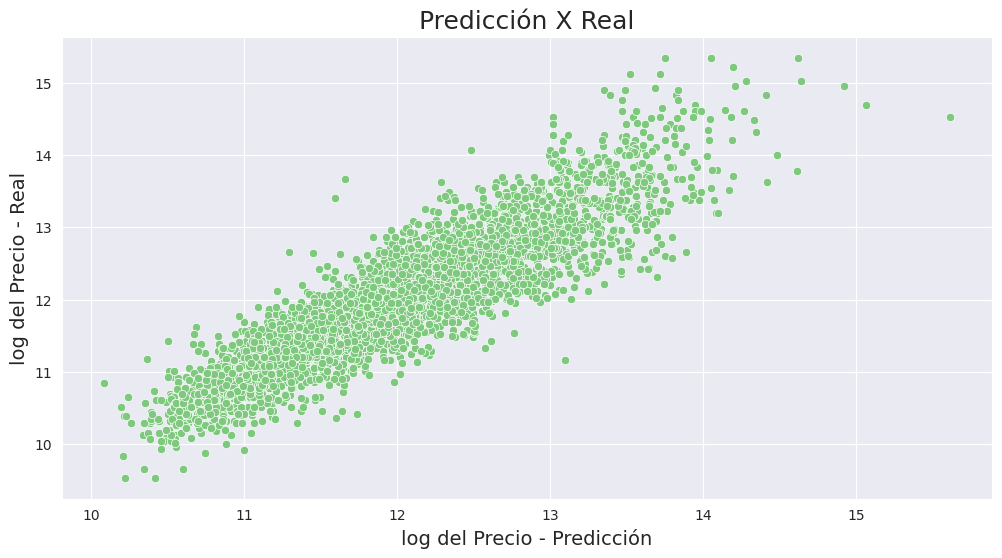

In [123]:
ax=sns.scatterplot(x=y_predicho_train,y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax;

La intención detrás de este gráfico es que los puntos sigan un patrón lineal. Cuanto más se aproximen los puntos a una línea recta, es decir, cuanto menor sea la dispersión, menor será el error en nuestras estimaciones.

A simple vista, observamos un comportamiento razonable en el gráfico. Sin embargo, notamos que para valores más altos de los inmuebles, la dispersión de los puntos aumenta. Esto podría atribuirse a la falta de datos en este rango, especialmente en el caso de los inmuebles de lujo que presentan características más singulares y están ubicados en regiones muy diferentes a los demás.

A pesar de esta dispersión, el gráfico sigue en gran medida una tendencia lineal, lo que sugiere que nuestro modelo no es del todo malo. Sin embargo, para mejorar el ajuste del modelo, sería prudente buscar más variables explicativas relevantes que puedan capturar mejor las diferencias en los precios.

Ahora, finalmente pasamos a los residuos. Recordando, los residuos son el término u del modelo, el término u que representa la parte de la variación en la variable dependiente que no pudo ser explicada por nuestro modelo, por las variables explicativas.

Los residuos son computados como la diferencia entre este término, el lnY menos este término aquí, lnβ1 + β2 multiplicado por log X2 + β3 multiplicado por lnX3. Entonces esa es la diferencia entre el valor verdadero y el valor estimado de lnY.

* Obteniendo los residuos

In [124]:
residuo = y_train - y_predicho_train

Ahora vamos a construir el histograma de los residuos y esperamos que este histograma tenga una forma parecida con la distribución normal,

* Graficando la distribuición de frecuencias de los residuos

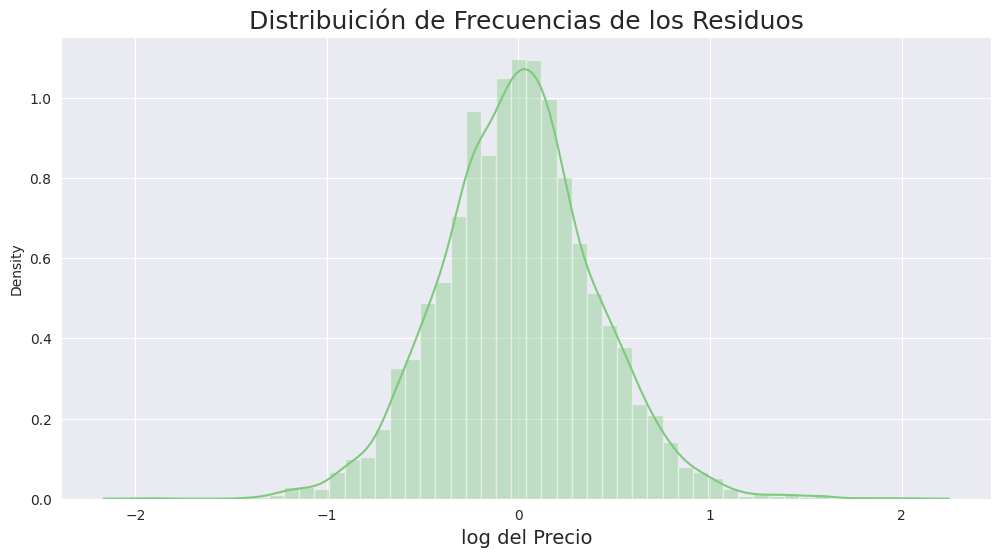

In [125]:
ax=sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax;

Entonces aquí tenemos una forma y estamos felices porque podemos ver que la distribución de los residuos se comporta bien, o sea, se parece más o menos a la distribución normal.

En el proyecto anterior realizamos otro análisis para verificar si los residuos tienen una varianza constante, lo que llamamos principio de homocedasticidad de los residuos.

Lo que quería mostrar era el comportamiento principal de los residuos, que era la distribución cercana a la distribución normal, con poca asimetría. Y también los puntos en este gráfico que van siguiendo más o menos una recta para que el modelo sea al menos razonable.

## **by: Jose Alfredo Ricardez Perez**